![picture](https://drive.google.com/uc?export=view&id=1wjkS0L1i30melKIDhytUFnlAbPCRUwIb)

<font size="6">**Final Team-Project - Team 17**</font>

<font size="4">IS5126 Hands-on with Applied Analytics<font>




**Team Members**

| Name | Student Id |
| ----- | ----- |
| Aniket Udaykumar | A0236563B |
| Niranjana Anand Unnithan |A0228601M  |
| Reshma Vijay Jawale | A0236581B | 
| Varsha Singh | A0232471M |
| Vidhu Verma | A0236592X |

## 1.&nbsp;Objective 

In this section, we'll upload our raw data scraped from steam, steamspy.com and metacritic and use various data cleaning and manipulation strategies to clean and manipulate it. We'll save the processed data and use R to perform data analysis.

## 2.&nbsp;Preparation

### Import libraries

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import re
import warnings
import json
warnings.filterwarnings(action='ignore')
import math
import seaborn as sns

### Google Drive Connection

In [ ]:
#connect with google drive to import raw data 
from google.colab import drive
import sys, os
# Mount google drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3.&nbsp;Data Preparation and Description

### 3.1&nbsp;Dataset description

>The data is scrapped from the website steams, steamspy and metacritic. This dataset provides information about various aspects of games on the store, such as its genre, ratings, reviews, price, the estimated number of owners and so on and so forth.



### 3.2&nbsp;Data Dictionary for raw data

>The raw data is  steam_app_data_10k.csv. 

>The `steam_app_data.csv` data set contains data of video game. The set include  10000 obeservations and  53 attributes . Each of the column is defined as follows:

-   `type` : type of each record is game
-   `steam_appid` : Unique identifier for each title
-   `is_free` : whether game is free or not
-   `controller_support` : Values are either Full or blank. Full Controller support means the whole game can be accessed with a controller, this includes all menus.
-   `dlc` : DLC means "downloadable content," and refers to features in video games that are downloaded separately from the main game
-   `required_age` : Minimum required age according to PEGI UK standards. 
-   `detailed_description` : description of game
-   `developers` : Name (or names) of developer(s). Semicolon delimited if multiple
-   `publishers` : Name (or names) of publisher(s). Semicolon delimited if multiple
-   `platforms` : Semicolon delimited list of supported platforms. At most includes: windows;mac;linux
-   `metacritic` : critic score retrived from Metacritic website
-   `reviews` : Textual reviews of each game
-   `categories` : Semicolon delimited list of game categories, e.g. single-player;multi-player
-   `genres` : Semicolon delimited list of game genres, e.g. action;adventure
-   `recommendations` : Total number of recommendations 
-   `achievements` : Total achievement with higlighted one
-   `release_date` : Release date in in various formats
-   `metacritic_user_score` : user score retrived from Metacritic website
-   `positive` : Total number of positive rating 
-   `negative` : Total number of negative rating
-   `owners` : This column is made up of the lower and upper bound of an estimation for the amount of owners for each title. For privacy reasons, SteamSpy can't get exact figures from Steam
-   `average_forever` : The total time the user has run this app since adding it to their library. Values are given in minutes.
-   `average_2weeks` : The total time the user has run this app in the two-week period leading up to when this data was requested from the API. Values are given in minutes.
-   `median_forever` : 
-   `median_2weeks` : 
-   `price` : The current price of the "app" on the Steam storefront, in US dollars. Free items have a price of 0.
-   `initialprice` : The initial price of the game when it was launched.
-   `discount` : The current discount on game at the time of scraping
-   `ccu` : concurrent users at the same moment in time
-   `youtube_stats` : It contains total number of views and comment of the top 50 videos uploaded in last week at time of scraping

  

### 3.3&nbsp;Import raw data(steam_app_data_10k.csv) 


In [ ]:
# Load  games statistic  dataframe
games_stats = pd.read_csv('/content/drive/MyDrive/IS5126/Project/Dataset/steam_app_data_10k.csv')

In [ ]:
#check the number of observation and attributes
print("games_stats shape:", games_stats.shape)

games_stats shape: (10000, 53)


In [ ]:
#view games information 
games_stats.head(2)

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,...,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,youtube_stats
0,game,Dota 2,570,0.0,True,NaN,"[1241930, 652720]",<strong>The most-played game on Steam.</strong...,<strong>The most-played game on Steam.</strong...,"Every day, millions of players worldwide enter...",...,"100,000,000 .. 200,000,000",35483,1461,929,852,0,0,0,589010,": 5,475,768 views and 10,283 comments for top ..."
1,game,Counter-Strike: Global Offensive,730,0.0,True,full,[1766730],Counter-Strike: Global Offensive (CS: GO) expa...,Counter-Strike: Global Offensive (CS: GO) expa...,Counter-Strike: Global Offensive (CS: GO) expa...,...,"50,000,000 .. 100,000,000",28940,841,6887,284,0,0,0,862238,": 37,980 views and 208 comments for top 50 vid..."


### 3.4&nbsp;Data Manipulation/Cleaning

In [ ]:
#check data type of column
games_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     9934 non-null   object 
 1   name                     10000 non-null  object 
 2   steam_appid              10000 non-null  int64  
 3   required_age             9934 non-null   float64
 4   is_free                  9934 non-null   object 
 5   controller_support       2712 non-null   object 
 6   dlc                      3533 non-null   object 
 7   detailed_description     9928 non-null   object 
 8   about_the_game           9928 non-null   object 
 9   short_description        9928 non-null   object 
 10  fullgame                 0 non-null      float64
 11  supported_languages      9930 non-null   object 
 12  header_image             9934 non-null   object 
 13  website                  7396 non-null   object 
 14  pc_requirements        

### 3.5&nbsp;Remove all not required columns

In this step we have removed the columns that we are not going to use in our analysis. 

For example, we have removed these columns with following reasons- 
1.   score_rank, fullgame column are removed  as they contains too many missing values

2.  descriptions column are removed as  they will not be used in our analysis. 

3. price and discount columns are removed as they were effective only during certain period of time when there were sales on video game. 

4. ccu is removed because it shows concurrent player at one moment in time. 


In [ ]:
games_stats.drop(games_stats.iloc[:, 7:11], inplace = True, axis = 1)
games_stats.drop(games_stats.iloc[:, 8:16], inplace = True, axis = 1)
games_stats.drop(['type','demos','developers','publishers','price_overview','reviews','screenshots','movies','achievements','support_info'\
                  ,'background','content_descriptors','score_rank','dlc','packages','package_groups','average_2weeks', 'median_2weeks','ccu', 'price','discount'], axis = 1, inplace=True)

In [ ]:
games_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   10000 non-null  object 
 1   steam_appid            10000 non-null  int64  
 2   required_age           9934 non-null   float64
 3   is_free                9934 non-null   object 
 4   controller_support     2712 non-null   object 
 5   supported_languages    9930 non-null   object 
 6   platforms              9934 non-null   object 
 7   metacritic             2745 non-null   object 
 8   categories             9860 non-null   object 
 9   genres                 9910 non-null   object 
 10  recommendations        6747 non-null   object 
 11  release_date           9934 non-null   object 
 12  metacritic_user_score  2711 non-null   object 
 13  positive               10000 non-null  int64  
 14  negative               10000 non-null  int64  
 15  own

### 3.6&nbsp;Handle missing values

Missing values are handled for below  columns -
- platform :  There are only a few records that are missing the platform. We discovered that they are old games with low ratings, so they have been removed.

- metacrtic & metacrtic_user_score : Section 3.11 deals with missing metacrtic and metacrtic user score. To limit the number of missing records, these attributes were scraped from the metacrtic website.

- supported_languages : With the understanding that each game support at least one language, missing values are replaced with English.(done in section 3.7)

- Categories: Section 3.7 deals with its missing values. This column is used to create the categories count column, which keeps track of how many categories the game fits into. With the understanding that a game would belong to at least one category, missing values are substituted with 1.


In [ ]:
print(games_stats.isnull().sum())

name                        0
steam_appid                 0
required_age               66
is_free                    66
controller_support       7288
supported_languages        70
platforms                  66
metacritic               7255
categories                140
genres                     90
recommendations          3253
release_date               66
metacritic_user_score    7289
positive                    0
negative                    0
owners                      0
average_forever             0
median_forever              0
initialprice                0
youtube_stats            3888
dtype: int64


In [ ]:
#drop if platform is missing 
games_stats.dropna(subset=['platforms'],inplace=True)
print(games_stats.isnull().sum())

name                        0
steam_appid                 0
required_age                0
is_free                     0
controller_support       7222
supported_languages         4
platforms                   0
metacritic               7189
categories                 74
genres                     24
recommendations          3187
release_date                0
metacritic_user_score    7223
positive                    0
negative                    0
owners                      0
average_forever             0
median_forever              0
initialprice                0
youtube_stats            3874
dtype: int64


### 3.7&nbsp;Datatype conversion and content parsing 

Almost every column in our dataset requires further processing before it can be used for analysis. We handled the columns in this part by extracting the relevant data and transforming it to the appropriate datatypes. We have also derived new columns based on existing columns. 

*italicized text*#### 1. Column - platform

It contains True or False values in string format for each of the three platforms: Windows, MAC, and Linux. We took the data for each platform and divided it into three columns: Window platform, Mac platform, and Linux platform, each of which has a value of 1 if the game is supported by it and 0 if it is not.

In [ ]:
platform_data=games_stats.platforms.str.split(expand=True)
games_stats[['Window_platform', 'Mac_platform','Linux_platform']]=platform_data[[1,3,5]]
games_stats['Window_platform']=games_stats['Window_platform'].str.replace(',','')
games_stats['Mac_platform']=games_stats['Mac_platform'].str.replace(',','')
games_stats['Linux_platform']=games_stats['Linux_platform'].str.replace('}','')

In [ ]:
games_stats[['Window_platform', 'Mac_platform','Linux_platform']].head(2)

,Window_platform,Mac_platform,Linux_platform
0,True,True,True
1,True,True,True


#### Column - youtube stats

It shows the number of comments and views for the top 50 videos uploaded in the previous week. Comments and views counts are retrieved and recorded in numeric format in new columns.

In [ ]:
youtube_data=games_stats.youtube_stats.str.split(expand=True)
games_stats[['youtube_view_count', 'youtube_comment_count']]=youtube_data[[1,4]]
games_stats['youtube_view_count']=games_stats['youtube_view_count'].str.replace(',','')
games_stats['youtube_comment_count']=games_stats['youtube_comment_count'].str.replace(',','')

#### Column - Owner

This column is made up of the lower and upper bound of an estimation for the amount of owners for each title. This column can be modified in several different ways. We opted to calculate the mid-point and save it in the column Total_owners  based on the analysis we'll be doing moving forward. As a result, we have 13 distinct values for this column.

In [ ]:
games_stats['owners']

0       100,000,000 .. 200,000,000
1        50,000,000 .. 100,000,000
2        50,000,000 .. 100,000,000
3        50,000,000 .. 100,000,000
4        50,000,000 .. 100,000,000
                   ...            
9995              20,000 .. 50,000
9996              20,000 .. 50,000
9997              20,000 .. 50,000
9998              20,000 .. 50,000
9999              20,000 .. 50,000
Name: owners, Length: 9934, dtype: object

In [ ]:
owner_data=games_stats.owners.str.split(expand=True)
games_stats[['Owner_min', 'Owner_max']]=owner_data[[0,2]]
games_stats['Owner_min']=games_stats['Owner_min'].str.replace(',','')
games_stats['Owner_max']=games_stats['Owner_max'].str.replace(',','')
games_stats['Total_owners']=((games_stats['Owner_min'].astype(int) + games_stats['Owner_max'].astype(int))/2).astype(int)

In [ ]:
games_stats['Total_owners'].head()

0    150000000
1     75000000
2     75000000
3     75000000
4     75000000
Name: Total_owners, dtype: int64

In [ ]:
#13 unique values for this column
games_stats['Total_owners'].nunique()

13

In [ ]:
games_stats['Total_owners'].unique()

array([150000000,  75000000,  35000000,   3500000,  15000000,   7500000,
         1500000,    150000,    350000,    750000,     35000,     75000,
           10000])

In [ ]:
games_stats['Total_owners'].value_counts().sort_values(ascending=False)

75000        3268
150000       2254
350000       2020
750000        868
35000         555
1500000       487
3500000       295
7500000        88
10000          39
15000000       37
35000000       18
75000000        4
150000000       1
Name: Total_owners, dtype: int64

#### Derived Column - total_owner_cat

Here we have created new column total_owner_cat by clustering Total_owners into 3 categories. 

- 10000 - 150000 owners in category 0  

- 350000 - 3.5 Million owners in category 1 

- 7.5 Million - 150 Million number of owners in category 2. 



In [ ]:
conditions = [
    (games_stats['Total_owners'] <= 150000),
    (games_stats['Total_owners'] > 150000) & (games_stats['Total_owners'] <= 3500000),
    (games_stats['Total_owners'] > 3500000)
]
values = [0, 1, 2,]

games_stats['total_owner_cat'] = np.select(conditions, values)

In [ ]:
games_stats['total_owner_cat'].value_counts()

0    6116
1    3670
2     148
Name: total_owner_cat, dtype: int64

#### Column - initialprice

For instance, the initialprice in raw data is 2999, whereas the game's actual pricing is 29.99 USD. After dividing by 100, initialprice is converted to its right form.

In [ ]:
games_stats['initialprice']= games_stats['initialprice']/100

In [ ]:
games_stats['initialprice']

0        0.00
1        0.00
2        0.00
3       39.99
4        0.00
        ...  
9995     1.99
9996    14.99
9997     6.99
9998     4.99
9999     5.99
Name: initialprice, Length: 9934, dtype: float64

#### Column - recommendation 

This shows the total number of recommendations for each game. In raw data the value is in form of {'total': 23290}. The total recommendation value is extracted and stored as int. 

In [ ]:
recommendations_data=games_stats.recommendations.str.split(expand=True)
games_stats[['recommendation']]=recommendations_data[[1]]
games_stats['recommendation']=games_stats['recommendation'].str.replace('}','')
games_stats['recommendation'] = games_stats['recommendation'].astype(float)

In [ ]:
games_stats['recommendation'].head()

0      14324.0
1    3340139.0
2    1592922.0
3     191689.0
4      13054.0
Name: recommendation, dtype: float64

#### column - release_date 

The game's release date is available in a variety of formats. A few examples are provided below : 
- {'coming_soon': False, 'date': '9 Jul, 2013'}
- {'coming_soon': False, 'date': '4/nov./2020'}
- {'coming_soon': False, 'date': '2 févr. 2021'}

Because the format isn't consistent, we've essentially retrieved the game's release year and placed it in a new column called release_year.

In [ ]:
def fix_release_date(row):
    date = row
    date = date.replace("/", " ")
    date = date.replace("\'", "")
    date = date.replace("}", "")
    release_data=date.split()
    try:
        int_year = int(release_data[-1])
    except:
        int_year = None 
    return int_year


In [ ]:
games_stats['release_year'] = games_stats.apply(lambda row: fix_release_date(row['release_date']),axis=1)

#### Derived column - age

A new feature age indicates the number of years the game has been in business.

In [ ]:
current_year = 2022
games_stats['age'] = current_year - games_stats['release_year'] 

#### Derived Column - overall_positive_rating 

The number of positive ratings garnered by a game is listed in the positive column. Similarly, the total number of bad ratings a game has earned is listed in negative. The aggregate of both is added to a new column called total rating. The ratio of positive ratings to total ratings is new feature overall_positive_rating.

In [ ]:
#Calculated positive rating 
games_stats['total_ratings'] = games_stats['positive'] + games_stats['negative']
games_stats['overall_positive_rating'] = round(((games_stats['positive'] / games_stats['total_ratings'])*10),1)

#### Column - supported_languages 

Observed that supported languages have NaN values. Replacing rows with NaN values with 1 under the assumption that the game should support atleast 1 language.

In [ ]:
# Create a new column languages_supported that contains no of languages supported by the game
games_stats['supported_languages'] = games_stats['supported_languages'].replace(r'<strong>\*</strong>', ' ',regex=True)
games_stats['supported_languages'] = games_stats['supported_languages'].fillna('English')
games_stats['languages_supported'] = games_stats.supported_languages.map(lambda x: [i.strip() for i in x.split(",") ]).apply(len)
games_stats.drop(['supported_languages'], axis = 1, inplace=True)


#### Column - metacritic user score and metacritic

As this column has a large number of null values, it is scrapped on top from the metacrtic website and added subsequently in section 3.11.

In [ ]:
metacritc_data=games_stats.metacritic.str.split(expand=True)
games_stats['metacritic']=metacritc_data[1]
games_stats['metacritic']=games_stats['metacritic'].str.replace(',','')
games_stats['metacritic']=games_stats['metacritic'].astype(float)

games_stats["metacritic_user_score"]=games_stats["metacritic_user_score"].replace('tbd',np.NaN) 
games_stats['metacritic_user_score']=games_stats['metacritic_user_score'].astype(float)

#### Column - categories
Identified that the column categories has 74 missing values. If categories column is null replacing with 1 else number of categories

In [ ]:
games_stats['categories']
games_stats['categories_count']=[1 if pd.isnull(i) else i.count('id') for i in games_stats['categories']]
games_stats.drop(['categories'], axis = 1, inplace=True)

#### Column - Controller_support 
The controller_support column has either has value full or its blank. A full indicates that the game is fully supported by the controller, whereas a blank indicates that the game is not supported. Full is replaced with 1 and blank with 0. 

In [ ]:
games_stats['controller_support']=games_stats['controller_support'].str.replace('full','True')
games_stats['controller_support']=games_stats['controller_support'].fillna('False')

#### Column genre 
Cleaning Genres column and One Hot encoding

In [ ]:
g_dict = {}
def genres_dict(row):
    h = row
    try:
        h = h.replace("\'", "\"")
    except:
        return
    y = json.loads(h)
    for x in y:
        id = json.dumps(x['id']).strip('"')
        if id not in g_dict.keys():
            genre = json.dumps(x['description']).strip('"')
            g_dict[id] = genre

In [ ]:
games_stats.apply(lambda row: genres_dict(row['genres']),axis=1)

# Dropping these 2 genres because their values are different language
del g_dict['70']
del g_dict['58']

In [ ]:
g_dict

{'1': 'Action',
 '18': 'Sports',
 '2': 'Strategy',
 '23': 'Indie',
 '25': 'Adventure',
 '28': 'Simulation',
 '29': 'Massively Multiplayer',
 '3': 'RPG',
 '37': 'Free to Play',
 '4': 'Casual',
 '50': 'Accounting',
 '51': 'Animation & Modeling',
 '52': 'Audio Production',
 '53': 'Design & Illustration',
 '54': 'Education',
 '55': 'Photo Editing',
 '56': 'Software Training',
 '57': 'Utilities',
 '59': 'Web Publishing',
 '60': 'Game Development',
 '71': 'Sexual Content',
 '72': 'Nudity',
 '73': 'Violent',
 '74': 'Gore',
 '80': 'Movie',
 '9': 'Racing'}

Creating new column with list of genres

In [ ]:
all_genres = []
def list_genres(row):
    list_of_genres = []
    h = row
    try:
        h = h.replace("\'", "\"")
    except:
        return list_of_genres
    y = json.loads(h)
    for x in y:
        g_id = json.dumps(x['id']).strip('"')
        if g_id in g_dict:
            to_append = g_dict[g_id]
            to_append = to_append.replace(' ', '_')
            to_append = to_append.replace('&', '_')
            to_append = to_append.lower()
            to_append = 'genre_' + to_append
            list_of_genres.append(to_append)
            if to_append not in all_genres:
                all_genres.append(to_append)
    return list_of_genres

In [ ]:
games_stats['genre_list'] = games_stats.apply(lambda row: list_genres(row['genres']),axis=1)
games_stats['genre_list']

0       [genre_action, genre_free_to_play, genre_strat...
1                      [genre_action, genre_free_to_play]
2       [genre_action, genre_adventure, genre_free_to_...
3       [genre_action, genre_adventure, genre_massivel...
4                      [genre_action, genre_free_to_play]
                              ...                        
9995         [genre_adventure, genre_casual, genre_indie]
9996                        [genre_indie, genre_strategy]
9997                                        [genre_indie]
9998          [genre_action, genre_indie, genre_strategy]
9999                                        [genre_indie]
Name: genre_list, Length: 9934, dtype: object

#### Derived column - genre_count

genre_count store total number of genre supported by a game. 

In [ ]:
games_stats['genre_count'] = games_stats.apply(lambda row: len(row['genre_list']),axis=1)
games_stats['genre_count']

0       3
1       2
2       4
3       4
4       2
       ..
9995    3
9996    2
9997    1
9998    3
9999    1
Name: genre_count, Length: 9934, dtype: int64

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

x = pd.DataFrame(mlb.fit_transform(games_stats['genre_list']),columns=mlb.classes_, index=games_stats.index)

In [ ]:
games_stats = games_stats.join(x)
games_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9934 entries, 0 to 9999
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         9934 non-null   object 
 1   steam_appid                  9934 non-null   int64  
 2   required_age                 9934 non-null   float64
 3   is_free                      9934 non-null   object 
 4   controller_support           9934 non-null   object 
 5   platforms                    9934 non-null   object 
 6   metacritic                   2745 non-null   float64
 7   genres                       9910 non-null   object 
 8   recommendations              6747 non-null   object 
 9   release_date                 9934 non-null   object 
 10  metacritic_user_score        2664 non-null   float64
 11  positive                     9934 non-null   int64  
 12  negative                     9934 non-null   int64  
 13  owners            

### 3.8&nbsp;Remove extra columns 

Removing columns that were either created temporarily during column modification  or are no longer needed because the value is now in the proper format in the new column.

In [ ]:
games_stats.drop(['youtube_stats','platforms', 'owners','Owner_min','Owner_max', 'positive','negative','median_forever', 'recommendations','genres','release_date','release_year','genre_list'], axis = 1, inplace=True)

In [ ]:
#replace all True value with 1 and False value with 0
games_stats= games_stats.replace({'True': 1, 'False': 0})

convert_dict = { 'required_age' : int,'is_free' : int}
games_stats = games_stats.astype(convert_dict)

Final dataset details

In [ ]:
games_stats.head()

,name,steam_appid,required_age,is_free,controller_support,metacritic,metacritic_user_score,average_forever,initialprice,Window_platform,...,genre_racing,genre_rpg,genre_sexual_content,genre_simulation,genre_software_training,genre_sports,genre_strategy,genre_utilities,genre_violent,genre_web_publishing
0,Dota 2,570,0,1,0,90.0,6.5,35483,0.00,1,...,0,0,0,0,0,0,1,0,0,0
1,Counter-Strike: Global Offensive,730,0,1,1,83.0,7.3,28940,0.00,1,...,0,0,0,0,0,0,0,0,0,0
2,PUBG: BATTLEGROUNDS,578080,0,1,0,NaN,NaN,21824,0.00,1,...,0,0,0,0,0,0,0,0,0,0
3,New World,1063730,0,0,0,70.0,5.7,9088,39.99,1,...,0,1,0,0,0,0,0,0,0,0
4,Team Fortress 2,440,0,1,0,92.0,9.0,9470,0.00,1,...,0,0,0,0,0,0,0,0,0,0


### 3.9&nbsp;Handle duplicate games
All AppIDs should be unique, and any rows with the same ID should be treated as duplicates. As a result, the duplicate steam id rows needs to be removed.

In [ ]:
games_stats = games_stats.drop_duplicates(subset='steam_appid', keep="first")

In [ ]:
games_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9853 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         9853 non-null   object 
 1   steam_appid                  9853 non-null   int64  
 2   required_age                 9853 non-null   int64  
 3   is_free                      9853 non-null   int64  
 4   controller_support           9853 non-null   int64  
 5   metacritic                   2719 non-null   float64
 6   metacritic_user_score        2639 non-null   float64
 7   average_forever              9853 non-null   int64  
 8   initialprice                 9853 non-null   float64
 9   Window_platform              9853 non-null   int64  
 10  Mac_platform                 9853 non-null   int64  
 11  Linux_platform               9853 non-null   int64  
 12  youtube_view_count           6024 non-null   object 
 13  youtube_comment_co

### 3.10&nbsp;Writing dataframe into the CSV
Following the pre-processing, game_stats dataframe is added to a csv file.

In [ ]:
games_stats.to_csv('/content/drive/MyDrive/IS5126/Project/Processed_data/games_stats.csv')

### 3.11&nbsp;Adding metacritic scraped data to the dataframe

There are a significant number of records that are missing metacritic records. To fill in for missing records, metacritc and metacrtic user score were scraped from the metacritic website and added to csv - games_stats_updated.csv

In [ ]:
games_stats_updated = pd.read_csv('/content/drive/MyDrive/IS5126/Project/Processed_data/games_stats_updated.csv')

In [ ]:
x = games_stats_updated[['steam_appid','metacritic','metacritic_user_score']]

In [ ]:
x = x.rename(columns={'metacritic': 'new_metacritic', 'metacritic_user_score': 'new_metacritic_user_score'})
# games_stats_updated[games_stats_updated['total_ratings']< 100]

In [ ]:
#remove duplicate appid
x = x.drop_duplicates(subset='steam_appid', keep="first")
x.head(3)

,steam_appid,new_metacritic,new_metacritic_user_score
0,570,90.0,6.5
1,730,83.0,7.3
2,578080,0.0,0.0


In [ ]:
#merge new and original dataframe on steam_appid
combined_games_stats = pd.merge(games_stats, x, on=['steam_appid'])

In [ ]:
combined_games_stats.head(2)

,name,steam_appid,required_age,is_free,controller_support,metacritic,metacritic_user_score,average_forever,initialprice,Window_platform,...,genre_sexual_content,genre_simulation,genre_software_training,genre_sports,genre_strategy,genre_utilities,genre_violent,genre_web_publishing,new_metacritic,new_metacritic_user_score
0,Dota 2,570,0,1,0,90.0,6.5,35483,0.0,1,...,0,0,0,0,1,0,0,0,90.0,6.5
1,Counter-Strike: Global Offensive,730,0,1,1,83.0,7.3,28940,0.0,1,...,0,0,0,0,0,0,0,0,83.0,7.3


#### Filter record with total_rating less than 100

Since we're trying to figure out what factors lead to a popular game/larger number of owners, we've excluded games with less than 100 ratings, reasoning that a popular game will have a rating of more than 100.

In [ ]:
combined_games_stats[combined_games_stats['total_ratings']< 100].head()

,name,steam_appid,required_age,is_free,controller_support,metacritic,metacritic_user_score,average_forever,initialprice,Window_platform,...,genre_sexual_content,genre_simulation,genre_software_training,genre_sports,genre_strategy,genre_utilities,genre_violent,genre_web_publishing,new_metacritic,new_metacritic_user_score
442,Sabre Team,1627140,0,0,0,NaN,NaN,0,6.99,1,...,0,0,0,0,1,0,0,0,0.0,0.0
719,Deep Night Runner,1887990,0,0,0,NaN,NaN,0,24.99,1,...,0,0,0,0,0,0,0,0,0.0,0.0
741,Ring of Fire: Prologue,1353950,0,1,0,NaN,NaN,0,0.00,1,...,0,1,0,0,0,0,0,0,0.0,0.0
791,DEATH TRAIN - Warning: Unsafe VR Experience,680780,0,0,0,NaN,NaN,126,9.99,1,...,0,0,0,0,0,0,0,0,0.0,0.0
859,The Pillage,715210,0,0,0,NaN,NaN,111,2.99,1,...,0,0,0,0,0,0,0,0,0.0,0.0


In [ ]:
combined_games_stats = combined_games_stats.drop(combined_games_stats[combined_games_stats['total_ratings'] < 100].index)

#### Derived column custom_user_score
custom_user_score is a new feature that offers user ratings in a more comprehensive way. It's a mix of metacritic user ratings and steam user reviews. If metacritic user score isn't present, custom user score will have overall positive rating; otherwise, it will contain the mean of overall positive rating and metacritic user score.

In [ ]:
combined_games_stats['custom_user_score'] = combined_games_stats.apply(lambda row: row['overall_positive_rating'] if (row['new_metacritic_user_score'] == 0 and row['total_ratings'] > 100) else round(((row['new_metacritic_user_score'] + row['overall_positive_rating'])/2),1) ,axis=1)

In [ ]:
combined_games_stats.drop(['metacritic','metacritic_user_score','new_metacritic','new_metacritic_user_score'], axis = 1, inplace=True)

In [ ]:
combined_games_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8729 entries, 0 to 9799
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         8729 non-null   object 
 1   steam_appid                  8729 non-null   int64  
 2   required_age                 8729 non-null   int64  
 3   is_free                      8729 non-null   int64  
 4   controller_support           8729 non-null   int64  
 5   average_forever              8729 non-null   int64  
 6   initialprice                 8729 non-null   float64
 7   Window_platform              8729 non-null   int64  
 8   Mac_platform                 8729 non-null   int64  
 9   Linux_platform               8729 non-null   int64  
 10  youtube_view_count           5658 non-null   object 
 11  youtube_comment_count        5658 non-null   object 
 12  Total_owners                 8729 non-null   int64  
 13  total_owner_cat   

### 3.12&nbsp;Write to CSV for for analysis

We have chosen R to perform data analysis. Therefore, all dataframe are stored as csv. 

In [ ]:
combined_games_stats.to_csv('/content/drive/MyDrive/IS5126/Project/Processed_data/games_stats_analysis.csv')

## 4.&nbsp;Exploratory Data Analysis

Exploratory Data Analysis, or EDA, is an important step in Data Analysis.It is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.

In [ ]:
combined_games_stats

,name,steam_appid,required_age,is_free,controller_support,average_forever,initialprice,Window_platform,Mac_platform,Linux_platform,...,genre_rpg,genre_sexual_content,genre_simulation,genre_software_training,genre_sports,genre_strategy,genre_utilities,genre_violent,genre_web_publishing,custom_user_score
0,Dota 2,570,0,1,0,35483,0.00,1,1,1,...,0,0,0,0,0,1,0,0,0,7.5
1,Counter-Strike: Global Offensive,730,0,1,1,28940,0.00,1,1,1,...,0,0,0,0,0,0,0,0,0,8.1
2,PUBG: BATTLEGROUNDS,578080,0,1,0,21824,0.00,1,0,0,...,0,0,0,0,0,0,0,0,0,5.6
3,New World,1063730,0,0,0,9088,39.99,1,0,0,...,1,0,0,0,0,0,0,0,0,6.2
4,Team Fortress 2,440,0,1,0,9470,0.00,1,1,1,...,0,0,0,0,0,0,0,0,0,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,Toonstruck,369830,0,0,0,0,9.99,1,1,1,...,0,0,0,0,0,0,0,0,0,8.8
9796,Cube - The Jumper,856440,0,0,0,13,1.99,1,0,0,...,0,0,0,0,0,0,0,0,0,3.5
9797,Gemini Wars,216130,0,0,0,57,14.99,1,1,0,...,0,0,0,0,0,1,0,0,0,4.5
9798,Snowdome,1131740,0,0,0,0,6.99,1,1,0,...,0,0,0,0,0,0,0,0,0,9.2


We have used the SweetViz library, an open-source Python library that generates beautiful, high-density visualizations to kickstart EDA with just two lines of code

In [ ]:
pip install sweetviz

In [ ]:
import sweetviz as sv

analyze_report = sv.analyze(combined_games_stats)
analyze_report.show_html('analyze.html',open_browser=False) # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.


In [ ]:
import IPython
IPython.display.HTML('analyze.html')

### 4.1 Most used Operating Platforms

We have three categorical columns - Window_platform, Mac_platform and Linux_platform. Below we have a plot of most widely used platform among these three. We can clearly see windows is most used by gamers followed by mac and linux platform is least used among all three platforms.

Text(0.5, 0, 'Platform')

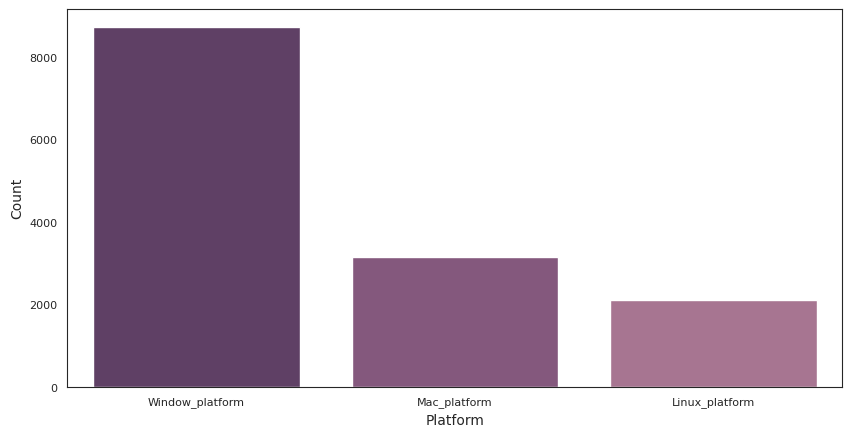

In [ ]:
windows, mac, linux = combined_games_stats[combined_games_stats['Window_platform'] == True].shape[0], combined_games_stats[combined_games_stats['Mac_platform'] == True].shape[0],combined_games_stats[combined_games_stats['Linux_platform'] == True].shape[0]
labels = ['Window_platform', 'Mac_platform','Linux_platform']

sns.set_style("white")
plt.figure(figsize=(10, 5))
plt.xticks(rotation=0)
sns.barplot(x=labels, y=[windows,mac,linux], palette=sns.cubehelix_palette(dark=0.3, light=.85, reverse=True))
plt.ylabel('Count', fontsize=10)
plt.xlabel('Platform', fontsize =10)

### 4.2 Genre Counts

We have total 13 genres in our dataset. Below we have a barplot of genres the game belongs to and their total counts. The most common genre is the indie genre indicating they are games made by independent or smaller development teams without financial support of a larger publisher.  Another common genre is action and adventure genre among games.

Text(0.5, 0, '')

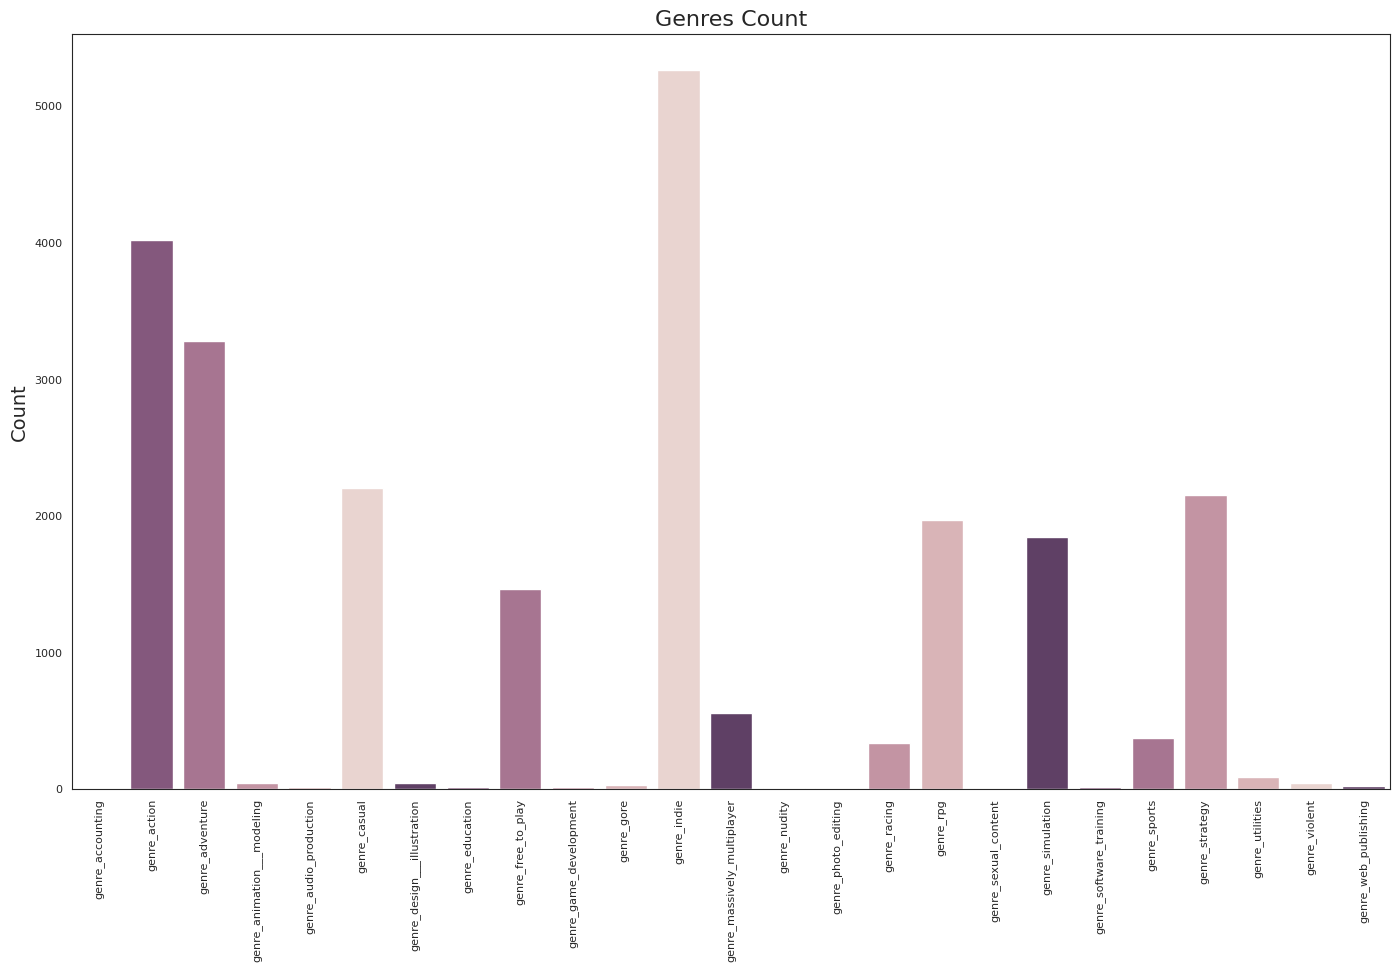

In [ ]:
genre_accounting, genre_action, genre_adventure,genre_animation___modeling,genre_audio_production,genre_casual,genre_design___illustration,genre_education,genre_free_to_play,genre_game_development,genre_gore,genre_indie,genre_massively_multiplayer,genre_nudity,genre_photo_editing,genre_racing,genre_rpg,genre_sexual_content,genre_simulation,genre_software_training,genre_sports,genre_strategy,genre_utilities,genre_violent,genre_web_publishing = combined_games_stats[combined_games_stats['genre_accounting'] == 1].shape[0], combined_games_stats[combined_games_stats['genre_action'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_adventure'] == True].shape[0],combined_games_stats[combined_games_stats['genre_animation___modeling'] == True].shape[0], combined_games_stats[combined_games_stats['genre_audio_production'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_casual'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_design___illustration'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_education'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_free_to_play'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_game_development'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_gore'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_indie'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_massively_multiplayer'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_nudity'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_photo_editing'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_racing'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_rpg'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_sexual_content'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_simulation'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_software_training'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_sports'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_strategy'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_utilities'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_violent'] == 1].shape[0],combined_games_stats[combined_games_stats['genre_web_publishing'] == 1].shape[0]
labels = ['genre_accounting', 'genre_action', 'genre_adventure','genre_animation___modeling','genre_audio_production','genre_casual','genre_design___illustration','genre_education','genre_free_to_play','genre_game_development','genre_gore','genre_indie','genre_massively_multiplayer','genre_nudity','genre_photo_editing','genre_racing','genre_rpg','genre_sexual_content','genre_simulation','genre_software_training','genre_sports','genre_strategy','genre_utilities','genre_violent','genre_web_publishing']
sns.set_style("white")
plt.figure(figsize=(17, 10))
plt.xticks(rotation=90)
sns.barplot(x=labels, y=[genre_accounting, genre_action, genre_adventure,genre_animation___modeling,genre_audio_production,genre_casual,genre_design___illustration,genre_education,genre_free_to_play,genre_game_development,genre_gore,genre_indie,genre_massively_multiplayer,genre_nudity,genre_photo_editing,genre_racing,genre_rpg,genre_sexual_content,genre_simulation,genre_software_training,genre_sports,genre_strategy,genre_utilities,genre_violent,genre_web_publishing], palette=sns.cubehelix_palette(dark=0.3, light=.85, reverse=True)).set_title(('Genres Count'), fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('',fontsize=20)

### 4.3 Best selling games by Sales

Below we have a graph of top selling games by ratings. Counter-strike is the top game having the highest ratings. The other top selling games are PUBG and DOTA 2.

Text(0, 0.5, 'Name')

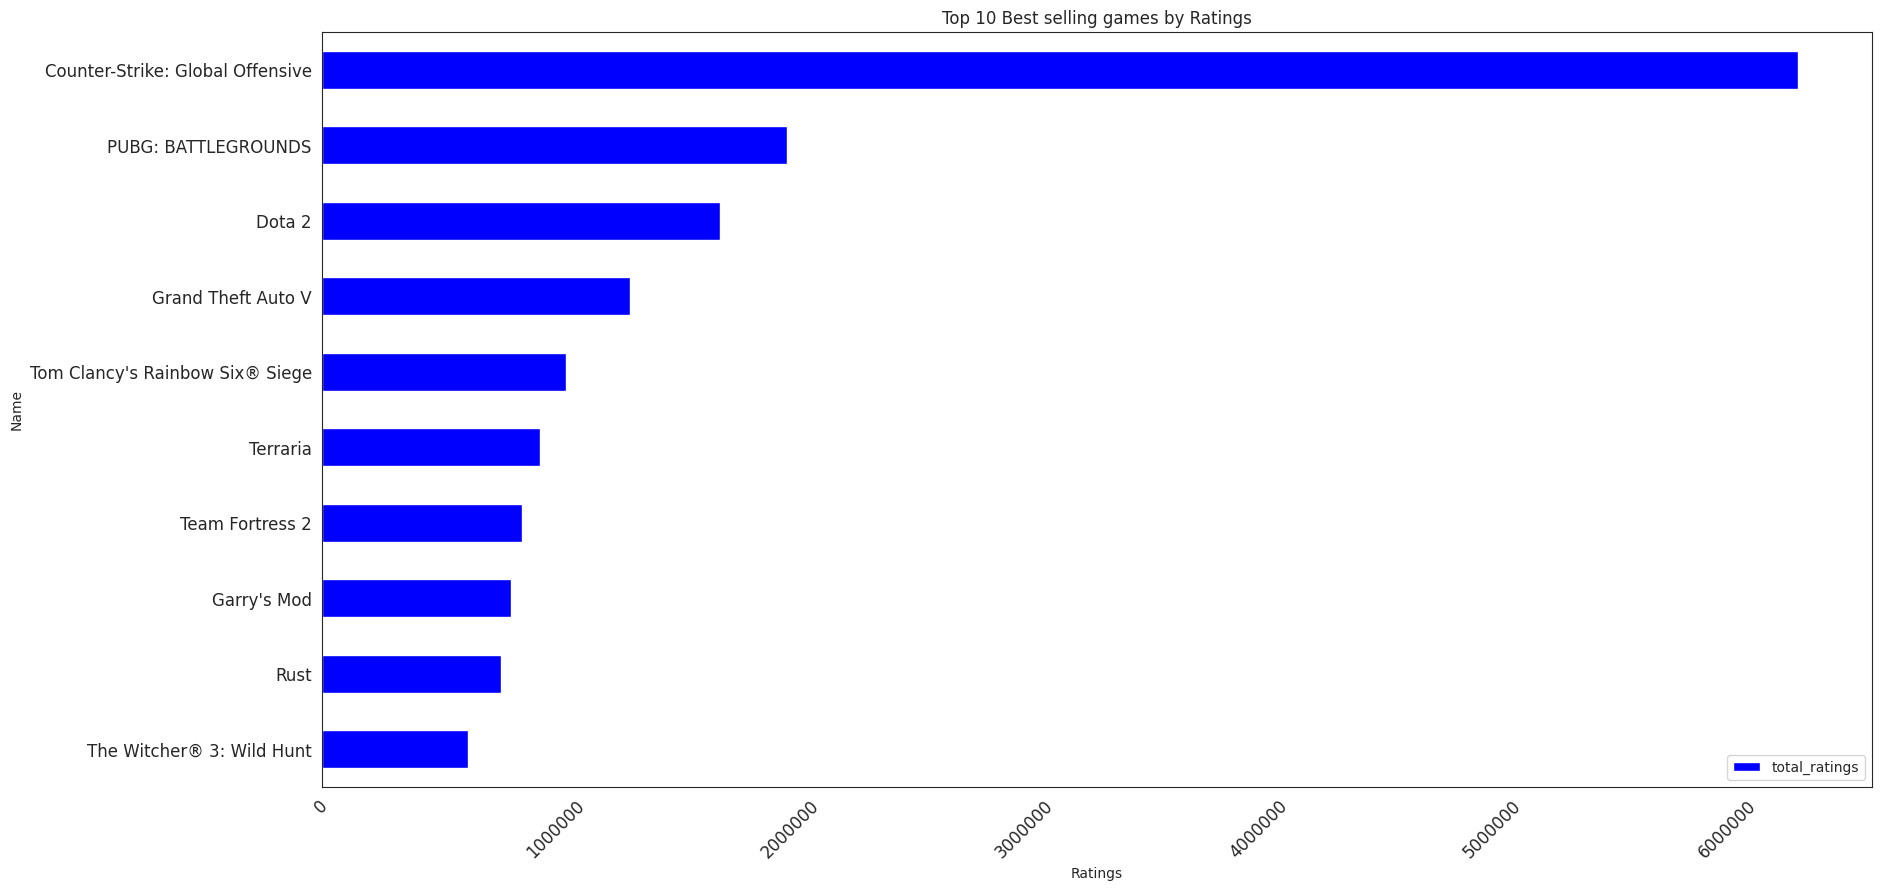

In [ ]:
combined_games_stats1 = pd.DataFrame(combined_games_stats.groupby('name')['total_ratings'].sum())
combined_games_stats1.sort_values(by=['total_ratings'], inplace=True)
combined_games_stats1 = combined_games_stats1.tail(10)
combined_games_stats1.plot.barh(y='total_ratings', figsize=(20, 10), fontsize=12,color="blue" )
plt.xticks(rotation=45)
plt.title("Top 10 Best selling games by Ratings")
plt.xlabel('Ratings', fontsize = 10)
plt.ylabel('Name', fontsize = 10)